In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

In [2]:
df = pd.read_csv('../data/soil_measures.csv')

In [3]:
df.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [4]:
df.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [5]:
df.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

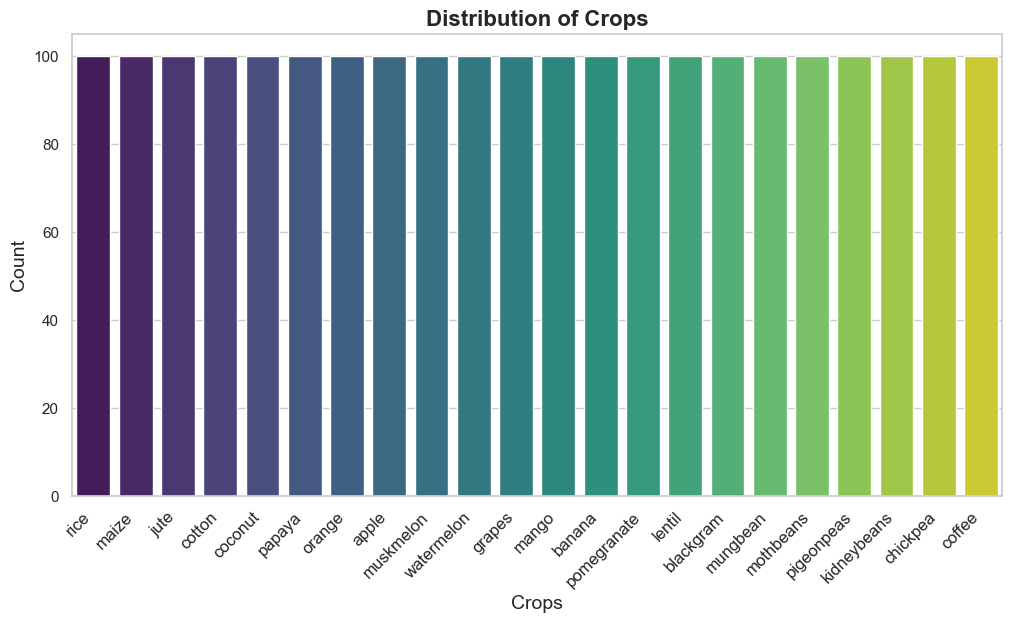

In [6]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=df['crop'].value_counts().index,  
    y=df['crop'].value_counts().values,  
    hue=df['crop'].value_counts().index, 
    palette="viridis",
    legend=False 
)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Crops", fontsize=14)
plt.title("Distribution of Crops", fontsize=16, fontweight="bold")


plt.show()

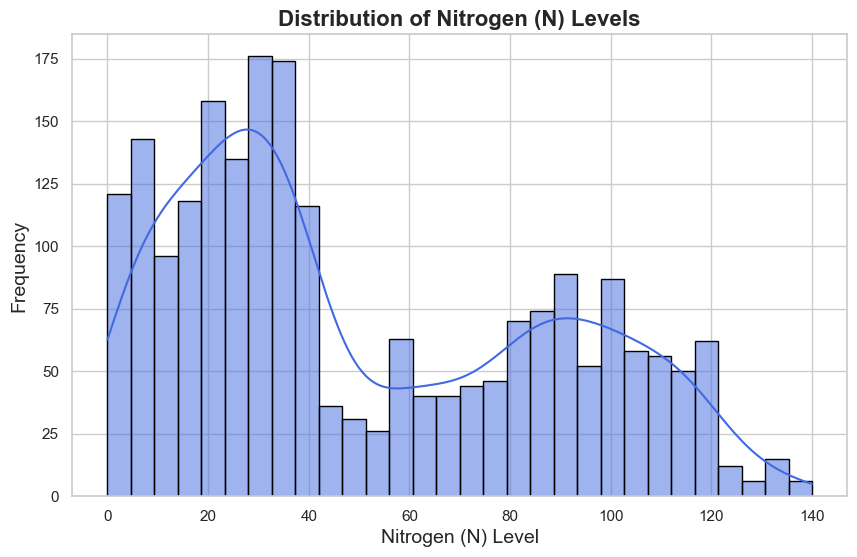

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['N'], kde=True, bins=30, color="royalblue", edgecolor="black")

plt.xlabel("Nitrogen (N) Level", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Nitrogen (N) Levels", fontsize=16, fontweight="bold")

plt.show()

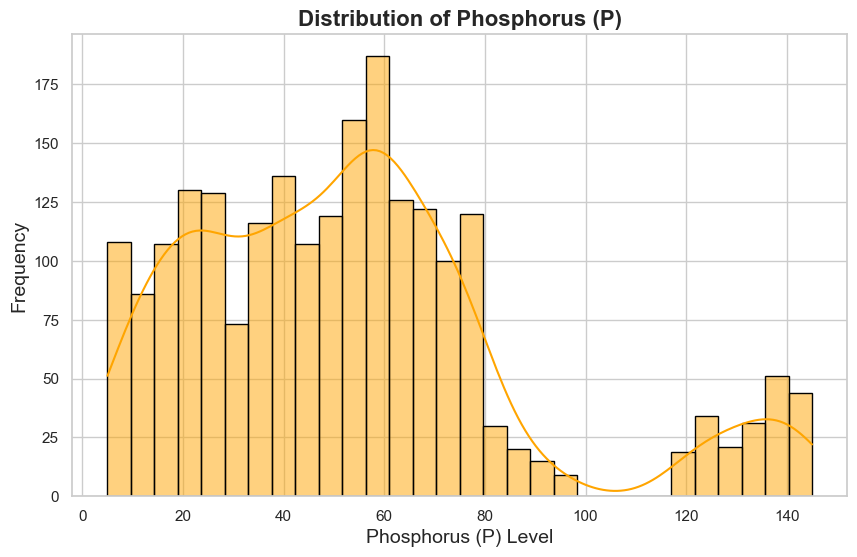

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['P'], kde=True, bins=30, color="orange", edgecolor="black")
plt.xlabel("Phosphorus (P) Level", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Phosphorus (P)", fontsize=16, fontweight="bold")
plt.show()

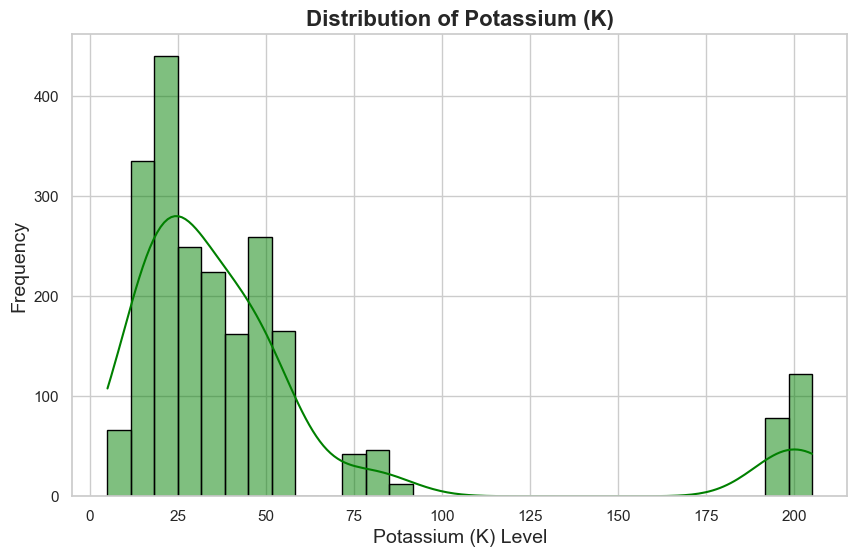

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['K'], kde=True, bins=30, color="green", edgecolor="black")
plt.xlabel("Potassium (K) Level", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Potassium (K)", fontsize=16, fontweight="bold")
plt.show()

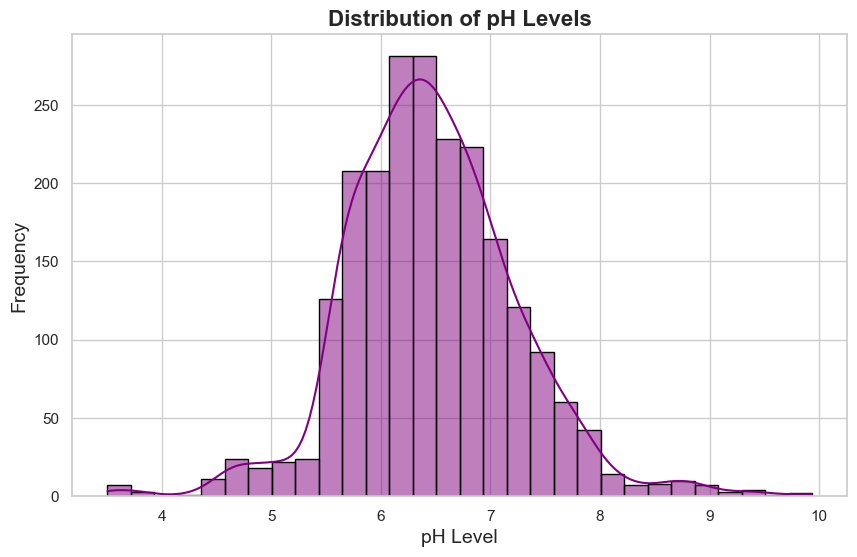

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ph'], kde=True, bins=30, color="purple", edgecolor="black")
plt.xlabel("pH Level", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of pH Levels", fontsize=16, fontweight="bold")
plt.show()

In [11]:
features = ['N', 'P', 'K', 'ph']
target = 'crop'

X, y = df[features], df[target]

In [12]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_validate
from lightgbm import LGBMClassifier

model = LGBMClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="weighted", zero_division=1),
    "recall": make_scorer(recall_score, average="weighted", zero_division=1),
    "f1": make_scorer(f1_score, average="weighted", zero_division=1),
}

results = {}
cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)

for metric in scoring.keys():
    scores = cv_results['test_' + metric]
    results[metric] = scores
    print(f"{metric.capitalize()} Scores: {scores}")
    print(f"Mean {metric.capitalize()}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Accuracy Scores: [0.77954545 0.775      0.80227273 0.77954545 0.77954545]
Mean Accuracy: 0.7832 ± 0.0097
Precision Scores: [0.7781298  0.77841755 0.80792519 0.78519366 0.7817923 ]
Mean Precision: 0.7863 ± 0.0111
Recall Scores: [0.77954545 0.775      0.80227273 0.77954545 0.77954545]
Mean Recall: 0.7832 ± 0.0097
F1 Scores: [0.77542732 0.77482307 0.80126662 0.77974965 0.77370493]
Mean F1: 0.7810 ± 0.0103


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 566
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 4
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [

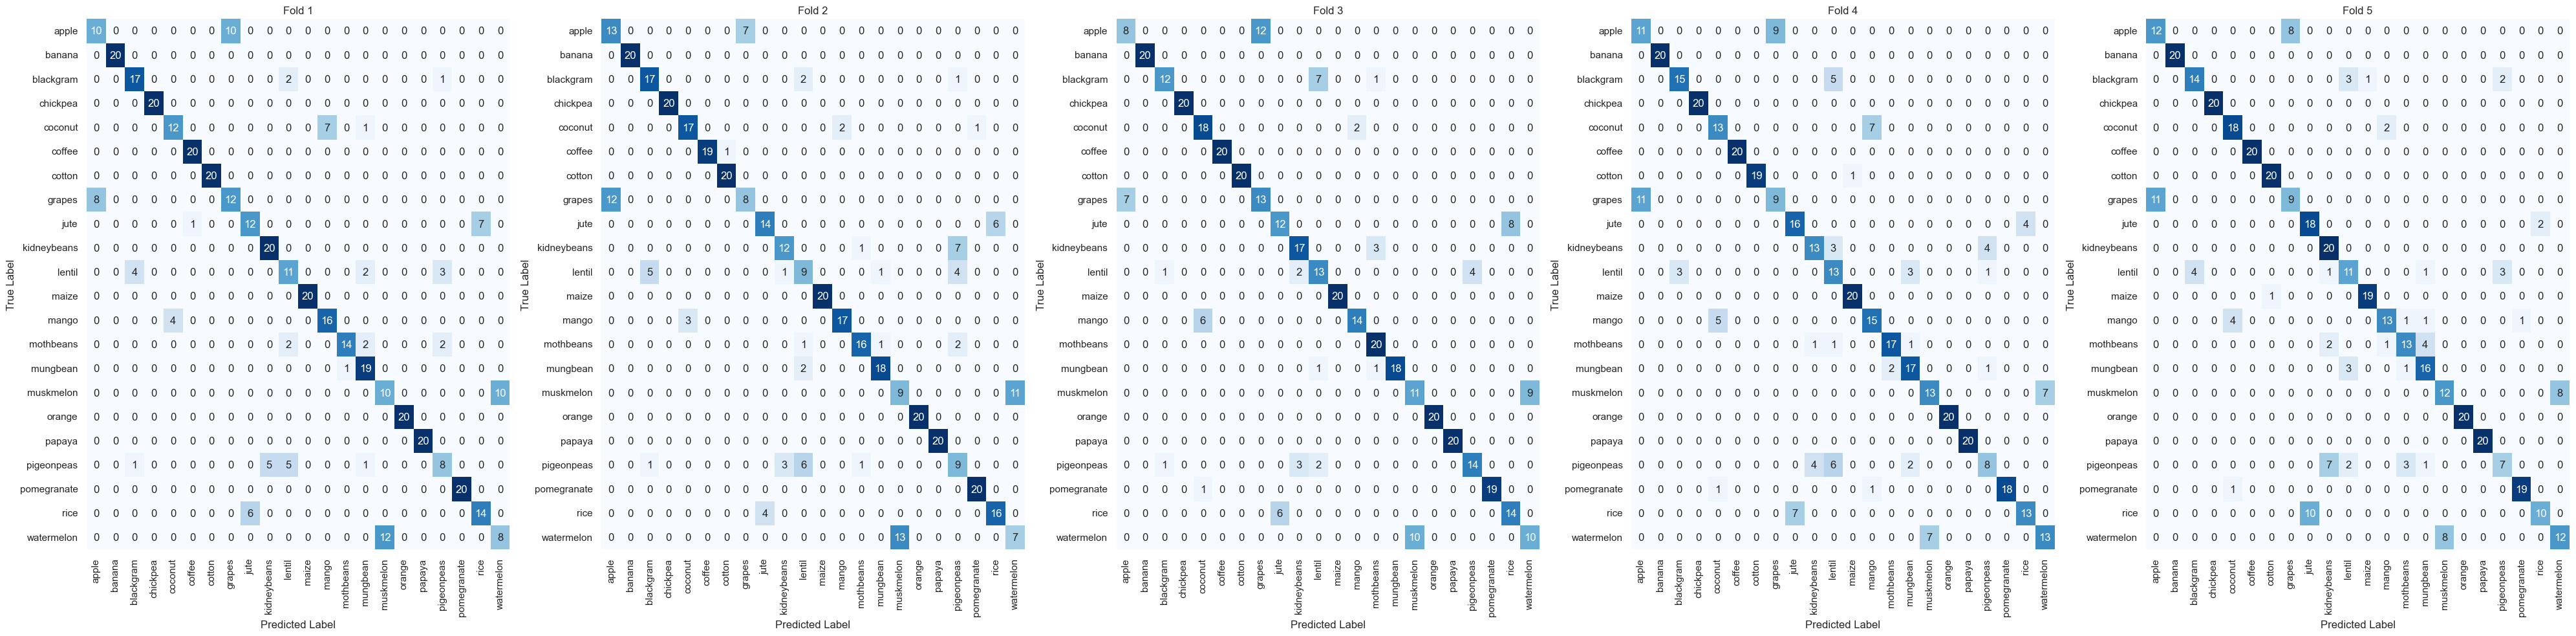

In [13]:
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(1, cv.get_n_splits(), figsize=(40, 10))

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    model.fit(X.iloc[train_idx], y.iloc[train_idx]) 
    y_pred = model.predict(X.iloc[test_idx]) 
    cm = confusion_matrix(y.iloc[test_idx], y_pred) 
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(y), yticklabels=np.unique(y), ax=axes[fold])
    axes[fold].set_xlabel('Predicted Label')
    axes[fold].set_ylabel('True Label')
    axes[fold].set_title(f'Fold {fold + 1}')

plt.tight_layout()
plt.show()

In [14]:
import shap
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LGBM model
model = LGBMClassifier()
model.fit(X_train, y_train)

# Create a SHAP explainer for the trained model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)


c:\Users\HP\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 4
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] [

100%|===================| 9677/9680 [12:07<00:00]        

IndexError: index 19 is out of bounds for axis 1 with size 4

<Figure size 1000x600 with 0 Axes>

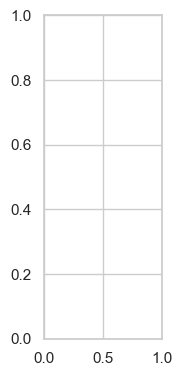

In [16]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(
    model,
    data=X_test,
    feature_perturbation="interventional",
    model_output="probability",
    feature_names=X_train.columns.tolist()
)


shap_explanations = explainer(
    X_test,
    check_additivity=False
)

if isinstance(shap_explanations, list):
    shap_values_combined = np.mean(shap_explanations, axis=0)
else:
    shap_values_combined = shap_explanations

plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values_combined,
    X_test,
    plot_type="dot",
    max_display=15,
    show=False
)

plt.title("SHAP Swarm Plot", fontsize=14)
plt.xlabel("SHAP Value")
plt.gcf().tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [15]:
shap_values

array([[[-1.45979788e+00,  2.38298916e+00,  1.47880843e-01, ...,
         -3.88182750e+00, -5.61174803e-01,  2.41738624e+00],
        [-6.42137953e-01, -2.16259166e+00, -6.76228384e-01, ...,
          2.35745679e+00, -9.31050561e-01,  2.66382923e+00],
        [-1.59777548e-01, -1.16630743e-03, -7.34120773e-01, ...,
          1.50121033e+00, -4.22169693e-01,  1.06836682e+00],
        [-2.48928656e-01, -2.23838219e-02, -1.14333415e+00, ...,
         -2.40381785e-01, -1.04903321e+00, -3.16432534e+00]],

       [[-1.29815326e+00,  2.38144405e+00,  1.47812877e-01, ...,
         -3.88462574e+00,  3.88610956e+00,  3.32101241e+00],
        [-6.38020199e-01, -2.16045551e+00, -6.76202568e-01, ...,
          2.36192459e+00, -1.37644111e+00,  3.98090631e+00],
        [-1.50569984e-01, -2.92784039e-03, -7.34049889e-01, ...,
          1.50071258e+00, -1.03333191e+00,  2.72541242e+00],
        [-1.74107855e-01, -2.26210302e-02, -1.14320417e+00, ...,
         -2.41934736e-01, -3.73649895e-01,  1.87479